### 多项式回归实战-天猫销量预测【双十一】

#### 创造数据

In [1]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
import numpy as np
from sklearn.linear_model import SGDRegressor

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

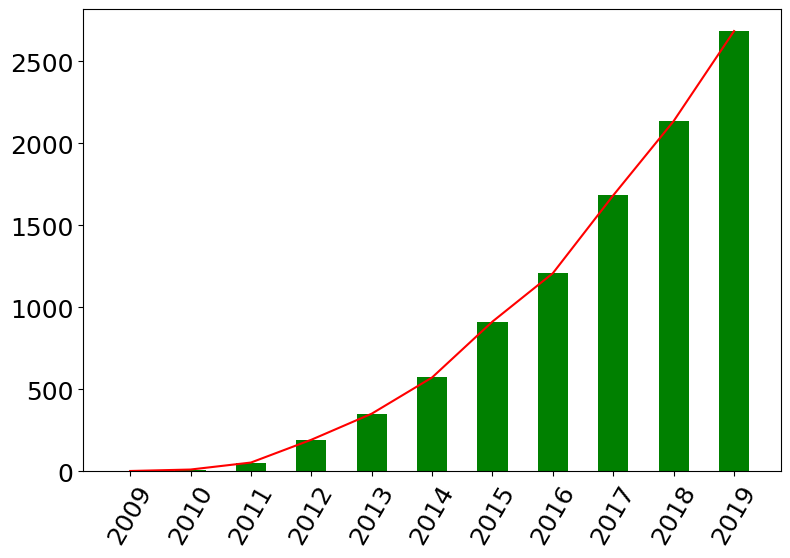

In [2]:
# 创建数据，年份数据2009 ~ 2019
X = np.arange(2009,2020) # 一维，注意机器学习模型中必须是二维的
# 天猫双十一销量
y = np.array([0.5,9.36,52,191,350,571,912,1207,1682,2135,2684])

plt.figure(figsize=(9,6))
plt.bar(X,y,width = 0.5,color = 'green') # 条形图
plt.plot(X,y,color = 'red') # 线形图
_ = plt.xticks(ticks = X,rotation = 60) # X轴刻度，设置成2009 - 2019
# 不用_ = plt.xticks会额外返回 坐标文字

#### 将数据X进行转换

In [3]:
display(X.shape)
X = X.reshape(-1,1)
display(X.shape)

(11,)

(11, 1)

In [10]:
X
# 年份数字相差1
# 基数太大，导致差异不明显，算法难以找规律

array([[2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]])

#### 特征工程

In [4]:
X -= 2008
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

In [ ]:
# 如果没有这一步，无法拟合的
X -= np.int32(X.mean())
X # 1 表示2009,11 表示2019,12表示2020

#### 升维处理

特征太少，进行升维处理

In [5]:
np.set_printoptions(suppress=True) # 科学计数法，就不显示

##### PolynomialFeatures包含截距

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3,include_bias=True)# 包含截距

X = poly.fit_transform(X)
display(X)

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.],
       [   1.,   11.,  121., 1331.]])

In [6]:
# # 如果PolynomialFeatures不包含截距
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(degree=3,include_bias=False)# 不包含截距

# X = poly.fit_transform(X)
# display(X)

array([[  -5.,   25., -125.],
       [  -4.,   16.,  -64.],
       [  -3.,    9.,  -27.],
       [  -2.,    4.,   -8.],
       [  -1.,    1.,   -1.],
       [   0.,    0.,    0.],
       [   1.,    1.,    1.],
       [   2.,    4.,    8.],
       [   3.,    9.,   27.],
       [   4.,   16.,   64.],
       [   5.,   25.,  125.]])

#### 归一化【算法中，包含梯度下降，都需要归一化】

##### PolynomialFeatures包含截距

In [ ]:
from sklearn.preprocessing import MinMaxScalerax

mms = MinMaxScalerax()

X = mmx.fit_transform(X)
X

In [7]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()

X = standard.fit_transform(X)
X

array([[ 0.        , -1.58113883, -1.15498576, -0.92062337],
       [ 0.        , -1.26491106, -1.0779867 , -0.90430853],
       [ 0.        , -0.9486833 , -0.94965495, -0.86002538],
       [ 0.        , -0.63245553, -0.7699905 , -0.77378977],
       [ 0.        , -0.31622777, -0.53899335, -0.63161755],
       [ 0.        ,  0.        , -0.2566635 , -0.41952458],
       [ 0.        ,  0.31622777,  0.07699905, -0.12352668],
       [ 0.        ,  0.63245553,  0.4619943 ,  0.27036028],
       [ 0.        ,  0.9486833 ,  0.89832225,  0.77612046],
       [ 0.        ,  1.26491106,  1.38598291,  1.40773802],
       [ 0.        ,  1.58113883,  1.92497626,  2.1791971 ]])

#### SGD建模

##### PolynomialFeatures包含截距

In [8]:
model = SGDRegressor(fit_intercept=False)

# 以往的数据，2009 到 2019
model.fit(X,y) # 建模

# warning：到达设置的迭代次数后仍未收敛
# Consider increasing max_iter to improve the fit

D:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(fit_intercept=False)

In [ ]:
# 不处理警告时的拟合效果（后续拟合过程同下）

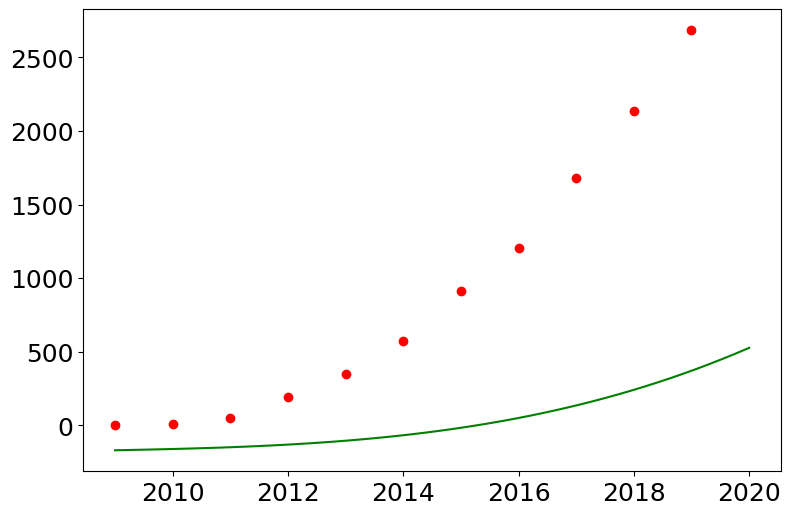

In [18]:
plt.figure(figsize=(9,6))
plt.scatter(np.arange(2009,2020),y,color = 'red')

plt.plot(np.linspace(2009,2020),y_,color = 'green')

In [ ]:
## 处理警告

In [12]:
model = SGDRegressor(fit_intercept=False,max_iter=5000,eta0=0.5)

# 以往的数据，2009 到 2019
model.fit(X,y) # 建模

SGDRegressor(eta0=0.5, fit_intercept=False, max_iter=5000)

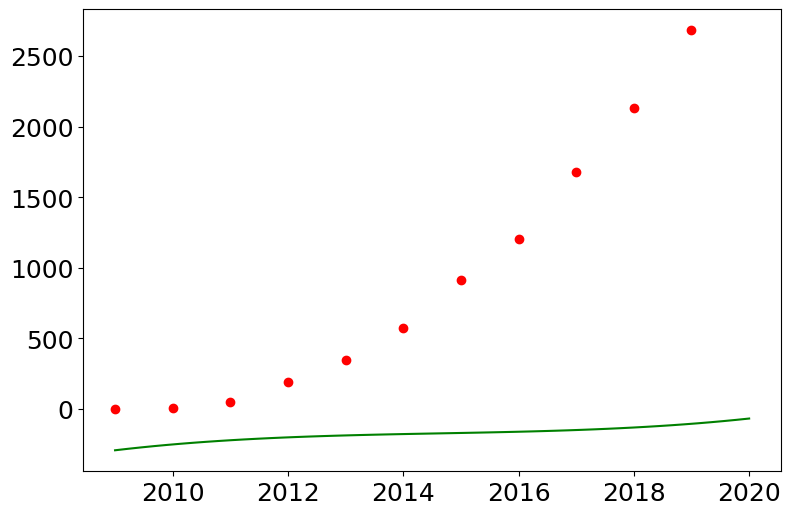

In [15]:
plt.figure(figsize=(9,6))
plt.scatter(np.arange(2009,2020),y,color = 'red')

plt.plot(np.linspace(2009,2020),y_,color = 'green')

In [15]:
model = SGDRegressor(fit_intercept=True,max_iter=5000,eta0=0.5)

# 以往的数据，2009 到 2019
model.fit(X,y) # 建模

SGDRegressor(eta0=0.5, max_iter=5000)

#### 算法验证【效果】

##### PolynomialFeatures包含截距

In [16]:
# 最大最小值归一化
X_test = np.linspace(1,12).reshape(-1,1) # 1表示2009，12表示2020   必须要是二维的
X_test = poly.fit_transform(X_test)  # 训练集升维了，测试集也需要升维

# 直接使用transform，相当于使用数据X的平均值和标准差，作为归一化的计算指标
X_test = standard.transform(X_test) # 直接使用standard进行转换
X_test[:10]

array([[ 0.        , -1.58113883, -1.15498576, -0.92062337],
       [ 0.        , -1.51014892, -1.14216861, -0.91867499],
       [ 0.        , -1.43915902, -1.12676453, -0.91586365],
       [ 0.        , -1.36816911, -1.1087735 , -0.91203116],
       [ 0.        , -1.2971792 , -1.08819552, -0.90701931],
       [ 0.        , -1.2261893 , -1.0650306 , -0.90066988],
       [ 0.        , -1.15519939, -1.03927873, -0.89282469],
       [ 0.        , -1.08420948, -1.01093991, -0.8833255 ],
       [ 0.        , -1.01321958, -0.98001415, -0.87201413],
       [ 0.        , -0.94222967, -0.94650145, -0.85873236]])

In [13]:
# 标准化
X_test = np.linspace(-5,6).reshape(-1,1) # 1表示2009，12表示2020   必须要是二维的
X_test = poly.fit_transform(X_test)  # 训练集升维了，测试集也需要升维

# 直接使用transform，相当于使用数据X的平均值和标准差，作为归一化的计算指标
X_test = standard.transform(X_test) # 直接使用standard进行转换
X_test[:10]

array([[ 0.        , -3.47850543, -0.53899335, -1.21429058],
       [ 0.        , -3.40751552, -0.59531822, -1.17678482],
       [ 0.        , -3.33652561, -0.64905613, -1.14264455],
       [ 0.        , -3.26553571, -0.70020711, -1.11171158],
       [ 0.        , -3.1945458 , -0.74877113, -1.08382768],
       [ 0.        , -3.12355589, -0.79474822, -1.05883467],
       [ 0.        , -3.05256599, -0.83813835, -1.03657432],
       [ 0.        , -2.98157608, -0.87894154, -1.01688843],
       [ 0.        , -2.91058617, -0.91715778, -0.9996188 ],
       [ 0.        , -2.83959627, -0.95278708, -0.98460721]])

In [17]:
# 算法根据以往的双十一销售规律，进行的预测
y_ = model.predict(X_test)
y_

array([-169.39421475, -167.6058065 , -165.7466211 , -163.78815966,
       -161.70192324, -159.45941296, -157.03212988, -154.39157511,
       -151.50924974, -148.35665484, -144.90529152, -141.12666086,
       -136.99226394, -132.47360187, -127.54217572, -122.16948659,
       -116.32703557, -109.98632374, -103.1188522 ,  -95.69612203,
        -87.68963432,  -79.07089016,  -69.81139065,  -59.88263687,
        -49.25612991,  -37.90337085,  -25.79586079,  -12.90510082,
          0.79740797,   15.3401645 ,   30.75166767,   47.0604164 ,
         64.29490959,   82.48364617,  101.65512503,  121.83784509,
        143.06030526,  165.35100445,  188.73844158,  213.25111555,
        238.91752527,  265.76616965,  293.82554761,  323.12415806,
        353.6904999 ,  385.55307206,  418.74037343,  453.28090292,
        489.20315946,  526.53564195])

#### 可视化查看拟合效果

##### PolynomialFeatures包含截距

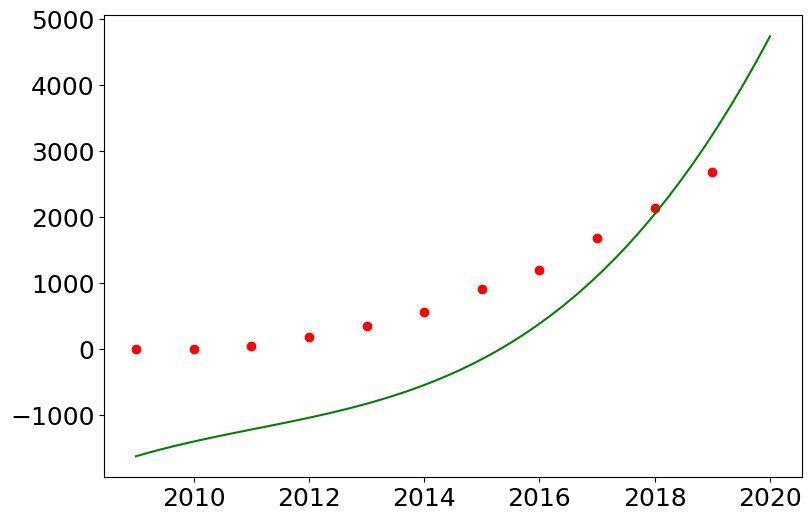

In [28]:
plt.figure(figsize=(9,6))
plt.scatter(np.arange(2009,2020),y,color = 'red')

plt.plot(np.linspace(2009,2020),y_,color = 'green')

##### PolynomialFeatures不包含截距

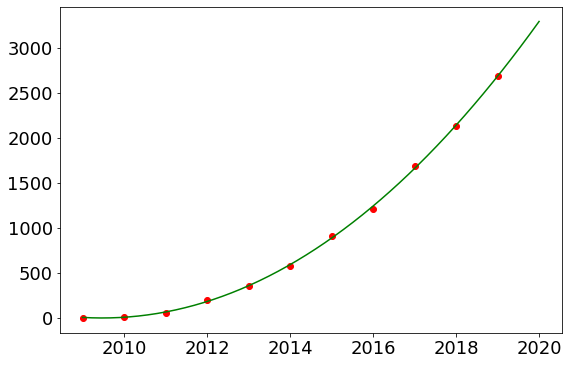

In [149]:
plt.figure(figsize=(9,6))
plt.scatter(np.arange(2009,2020),y,color = 'red')

plt.plot(np.linspace(2009,2020),y_,color = 'green')

### 逻辑斯蒂回归使用

In [150]:
# 存在于这个linear_model中，说明逻辑斯蒂回归和线性回归，有关系！！
# 逻辑斯蒂回归内部，是一个线性回归模型 + sigmoid函数，进行概率的转化
# 概率 0 到 1 根据数字的大小，分类 设置阈值 < 0.5 甲类，大于等于 0.5 乙类
# 关键：逻辑斯蒂回归用于解决分类问题
# 逻辑斯蒂回归，名字虽然带着回归，不可以解决回归问题，它是一个分类算法
# 老婆饼，没有老婆
# 红烧狮子头，有狮子吗？
from sklearn.linear_model import LogisticRegression # 逻辑斯蒂回归

#### sigmoid曲线绘制

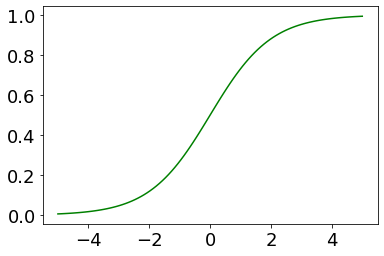

In [151]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1/(1 + np.exp(-x))
x = np.linspace(-5,5,100)
y = sigmoid(x)
plt.plot(x,y,color = 'green')

### 逻辑斯蒂回归分类

In [152]:
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_iris

#### 加载数据

In [153]:
X,y = load_iris(return_X_y=True)
display(X.shape,y)

(150, 4)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 拆分

In [154]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15) # 15%保留作为测试数据
display(X_train.shape,X_test.shape)

(127, 4)

(23, 4)

#### 建模

In [155]:
model = LogisticRegression(max_iter=1000) # 默认的参数使100，没有拟合好，提升参数的次数

model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

#### 预测

In [156]:
y_ = model.predict(X_test)
display('真实类别：',y_test)
display('算法预测：',y_)

'真实类别：'

array([0, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1,
       0])

'算法预测：'

array([0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1,
       0])

In [157]:
model.score(X_test,y_test)

0.9130434782608695

#### 概率

In [158]:
model.predict_proba(X_test)

array([[0.97754451, 0.02245546, 0.00000003],
       [0.00002269, 0.03559619, 0.96438111],
       [0.00778803, 0.89474849, 0.09746348],
       [0.08136146, 0.91461311, 0.00402542],
       [0.01008948, 0.57484769, 0.41506283],
       [0.00355854, 0.41223687, 0.58420459],
       [0.02465211, 0.91150878, 0.06383912],
       [0.98561179, 0.01438818, 0.00000003],
       [0.00012086, 0.11913934, 0.88073979],
       [0.94966947, 0.05033035, 0.00000017],
       [0.07361101, 0.92094118, 0.00544781],
       [0.96690091, 0.033099  , 0.00000009],
       [0.97475356, 0.02524637, 0.00000007],
       [0.0334601 , 0.94945181, 0.01708809],
       [0.29283985, 0.70573553, 0.00142462],
       [0.98448304, 0.01551693, 0.00000003],
       [0.00328052, 0.8273788 , 0.16934068],
       [0.01448564, 0.73721358, 0.24830079],
       [0.0000299 , 0.13491685, 0.86505325],
       [0.98040689, 0.01959306, 0.00000005],
       [0.00000227, 0.03042016, 0.96957758],
       [0.01065964, 0.92680796, 0.0625324 ],
       [0.

#### 方程，线性回归方程

In [159]:
w_=model.coef_

In [165]:
b_ = model.intercept_
b_

array([  9.99194245,   2.65965726, -12.65159971])

In [161]:
w_

array([[-0.45604417,  0.81521403, -2.38355513, -0.97404674],
       [ 0.44558855, -0.41502772, -0.14455525, -0.99933968],
       [ 0.01045561, -0.40018631,  2.52811037,  1.97338642]])

In [177]:
z= X_test.dot(w_.T) + b_
def softmax(x):
    return np.e**x/((np.e**x).sum(axis = 1)).reshape(-1,1)
softmax(z)

array([[0.97754451, 0.02245546, 0.00000003],
       [0.00002269, 0.03559619, 0.96438111],
       [0.00778803, 0.89474849, 0.09746348],
       [0.08136146, 0.91461311, 0.00402542],
       [0.01008948, 0.57484769, 0.41506283],
       [0.00355854, 0.41223687, 0.58420459],
       [0.02465211, 0.91150878, 0.06383912],
       [0.98561179, 0.01438818, 0.00000003],
       [0.00012086, 0.11913934, 0.88073979],
       [0.94966947, 0.05033035, 0.00000017],
       [0.07361101, 0.92094118, 0.00544781],
       [0.96690091, 0.033099  , 0.00000009],
       [0.97475356, 0.02524637, 0.00000007],
       [0.0334601 , 0.94945181, 0.01708809],
       [0.29283985, 0.70573553, 0.00142462],
       [0.98448304, 0.01551693, 0.00000003],
       [0.00328052, 0.8273788 , 0.16934068],
       [0.01448564, 0.73721358, 0.24830079],
       [0.0000299 , 0.13491685, 0.86505325],
       [0.98040689, 0.01959306, 0.00000005],
       [0.00000227, 0.03042016, 0.96957758],
       [0.01065964, 0.92680796, 0.0625324 ],
       [0.